<a href="https://colab.research.google.com/github/lattehauma/-/blob/main/goemotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd

In [ ]:
ds, info=tfds.load('goemotions',with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/goemotions/0.1.0.incompleteLGYOJ1/goemotions-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/goemotions/0.1.0.incompleteLGYOJ1/goemotions-validation.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/goemotions/0.1.0.incompleteLGYOJ1/goemotions-test.tfrecord


Dataset goemotions downloaded and prepared to /root/tensorflow_datasets/goemotions/0.1.0. Subsequent calls will reuse this data.


In [ ]:
train=tfds.load("goemotions",split='train')
validation=tfds.load("goemotions",split='validation')
test=tfds.load("goemotions",split='test')

Shuffling and writing examples to /root/tensorflow_datasets/goemotions/0.1.0.incompleteWG2MJF/goemotions-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/goemotions/0.1.0.incompleteWG2MJF/goemotions-validation.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/goemotions/0.1.0.incompleteWG2MJF/goemotions-test.tfrecord


Dataset goemotions downloaded and prepared to /root/tensorflow_datasets/goemotions/0.1.0. Subsequent calls will reuse this data.


In [ ]:
train_ds=tfds.as_dataframe(train)

In [ ]:
validation_ds=tfds.as_dataframe(validation)
test_ds=tfds.as_dataframe(test)

In [ ]:
test_ds.head(5)

,admiration,amusement,anger,annoyance,approval,caring,comment_text,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,neutral,optimism,pride,realization,relief,remorse,sadness,surprise
0,False,False,False,False,True,False,"b""You're right, thanks for pointing that out, ...",False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,b'Molon labe!!!',False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,b'So this is what edging feels like',False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,b'Just speak with a Sheffield accent lmao',False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,b'My husband and I have been circling the drai...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
y_train1=train_ds.drop('comment_text',axis=1)
y_val1=validation_ds.drop('comment_text',axis=1)
y_test1=test_ds.drop('comment_text',axis=1)

In [ ]:
for i in range(0,43410):
  for j in range(0,28):
    if y_train1.iloc[i,j]==False:
      y_train1.iloc[i,j]=0
    else:
      y_train1.iloc[i,j]=1

In [ ]:
for i in range(0,5427):
  for j in range(0,28):
    if y_test1.iloc[i,j]==False:
      y_test1.iloc[i,j]=0
    else:
      y_test1.iloc[i,j]=1

In [ ]:
for i in range(0,5426):
  for j in range(0,28):
    if y_val1.iloc[i,j]==False:
      y_val1.iloc[i,j]=0
    else:
      y_val1.iloc[i,j]=1

In [ ]:
y_train= y_train1.to_numpy()
y_test= y_test1.to_numpy()
y_val= y_val1.to_numpy()
print(sum(y_train[0]))

1


In [ ]:
x=0
for i in range(0,5426):
  if sum(y_test[i])>=2:
    x = x+1

In [ ]:
x

837

In [ ]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [ ]:
x_train1=train_ds['comment_text']
x_val1=validation_ds['comment_text']
x_test1=test_ds['comment_text']

In [ ]:
x_train=x_train1.tolist()
x_test=x_test1.tolist()
x_val=x_val1.tolist()
x_train[1:10]

[b'This is actually awesome.',
 b"People really spend more than $10 in an app game? I mean an actual video game I can understand but that's just...sad",
 b'I grew up on the other side of Ama but live in Tulia now. I will have some El Burrito for you',
 b'What the problem? I mean, steak? Good. Doughnuts? Good!! I don\xe2\x80\x99t see an issue. ',
 b'I second disagreeing that they are awesome.',
 b'fucking fuck fuck',
 b'Yes. Exactly. Anything non [NAME] belongs in the trash. Glad you agree.',
 b"West Hartford, CT. Unfortunately it's not religious. Thank you for the response.",
 b'Same thing happened to me last year ended horribly']

In [ ]:
ay_train=[]
ax_train=[]
for i in range(0,len(y_train)):
  if sum(y_train[i])==1:
    ay_train.append(y_train[i])
    ax_train.append(x_train[i])
ay_test=[]
ax_test=[]
for i in range(0,len(y_test)):
  if sum(y_test[i])==1:
    ay_test.append(y_test[i])
    ax_test.append(x_test[i])
ay_val=[]
ax_val=[]
for i in range(0,len(y_val)):
  if sum(y_val[i])==1:
    ay_val.append(y_val[i])
    ax_val.append(x_val[i])

print(len(ay_train))
print(len(ax_train))
print(len(ay_test))
print(len(ax_test))
print(len(ay_val))
print(len(ax_val))

36308
36308
4590
4590
4548
4548


In [ ]:
len(ax_train)

36308

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
tokenizer=Tokenizer(num_words=10000)
tokenizer.fit_on_texts([x.decode('utf-8') for x in ax_train] )
word_id=tokenizer.word_index
print(word_id)
seq1=tokenizer.texts_to_sequences([x.decode('utf-8') for x in ax_train])
seq2=tokenizer.texts_to_sequences([x.decode('utf-8') for x in ax_test])
seq3=tokenizer.texts_to_sequences([x.decode('utf-8') for x in ax_val])
x_train_fin=sequence.pad_sequences(seq1, maxlen=50)
x_test_fin=sequence.pad_sequences(seq2, maxlen=50)
x_val_fin=sequence.pad_sequences(seq3, maxlen=50)

In [ ]:
print(x_train_fin.shape)

(36308, 60)


In [ ]:

print(x_test_fin[3])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
   22  905   26    4 2703  321]


In [ ]:
y_train_fin = np.asarray(ay_train).astype('float32')
y_test_fin = np.asarray(ay_test).astype('float32')
y_val_fin = np.asarray(ay_val).astype('float32')

In [ ]:
ay_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding,Dropout
model=Sequential()
model.add(Embedding(10000,95,input_length=30))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(28, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 30, 95)            950000    
_________________________________________________________________
flatten_6 (Flatten)          (None, 2850)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 2850)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               364928    
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 28)                3612      
Total params: 1,318,540
Trainable params: 1,318,540
Non-trainable params: 0
____________________________________________

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding,Dropout, BatchNormalization, LSTM, SimpleRNN
from tensorflow.keras import regularizers, initializers
model=Sequential()
model.add(Embedding(10000,95,input_length=50))
model.add(BatchNormalization(momentum=0.999))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(Dense(28, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 95)            950000    
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 95)            380       
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 95)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4750)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               608128    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 28)               

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding,Dropout, BatchNormalization, LSTM
from tensorflow.keras import regularizers, initializers
m_lstm=Sequential()
m_lstm.add(Embedding(10000,32,input_length=30))
m_lstm.add(BatchNormalization())
m_lstm.add(LSTM(32))
m_lstm.add(Dropout(0.2))
m_lstm.add(Dense(28,activation='softmax',kernel_regularizer=regularizers.l1(0.01)))
m_lstm.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 30, 32)            320000    
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 32)            128       
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 28)                924       
Total params: 329,372
Trainable params: 329,308
Non-trainable params: 64
_________________________________________________________________


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer='adam',metrics=["accuracy"])
result=model.fit(x_train_fin, y_train_fin, epochs=7, batch_size=32, validation_data=(x_val_fin,y_val_fin))


Epoch 1/7
1135/1135 [==============================] - 26s 22ms/step - loss: 2.6091 - accuracy: 0.3815 - val_loss: 2.8407 - val_accuracy: 0.3505
Epoch 2/7
1135/1135 [==============================] - 25s 22ms/step - loss: 1.8063 - accuracy: 0.5234 - val_loss: 2.6205 - val_accuracy: 0.3701
Epoch 3/7
1135/1135 [==============================] - 24s 22ms/step - loss: 1.3705 - accuracy: 0.6094 - val_loss: 2.2898 - val_accuracy: 0.4096
Epoch 4/7
1135/1135 [==============================] - 24s 21ms/step - loss: 1.0715 - accuracy: 0.6867 - val_loss: 1.9797 - val_accuracy: 0.4769
Epoch 5/7
1135/1135 [==============================] - 24s 22ms/step - loss: 0.8546 - accuracy: 0.7485 - val_loss: 2.0091 - val_accuracy: 0.4934
Epoch 6/7
1135/1135 [==============================] - 25s 22ms/step - loss: 0.7371 - accuracy: 0.7815 - val_loss: 2.0960 - val_accuracy: 0.5145
Epoch 7/7
1135/1135 [==============================] - 24s 21ms/step - loss: 0.6414 - accuracy: 0.8129 - val_loss: 2.3220 - val_ac

In [ ]:
model.evaluate(x_train_fin,y_train_fin)
model.evaluate(x_test_fin,y_test_fin)

144/144 [==============================] - 0s 2ms/step - loss: 2.3157 - accuracy: 0.4869


[2.315670967102051, 0.4869281053543091]

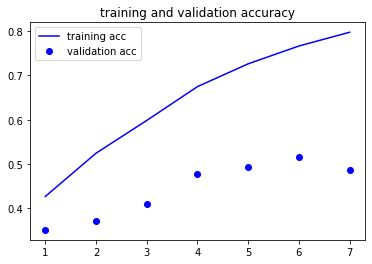

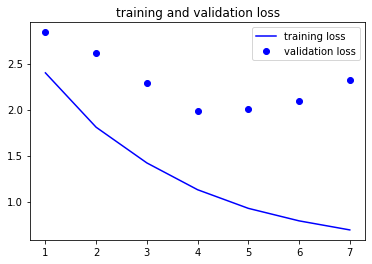

In [ ]:
import matplotlib.pyplot as plt
acc=result.history['accuracy']
val_acc=result.history['val_accuracy']
loss=result.history['loss']
val_loss=result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [ ]:
import os
glove_dir='/content/drive/MyDrive/colab/glove'
embedding_index={}
f=open(os.path.join(glove_dir,'glove.6B.100d.txt'),encoding='UTF8')
for line in f:
    values=line.split()
    word=values[0]
    seq=np.asarray(values[1:],dtype='float32')
    embedding_index[word]=seq
f.close
print(len(embedding_index))

400000


In [ ]:
embedding_dim=100
embedding_matrix=np.zeros((10000,embedding_dim))
for word,i in word_id.items():
    if i<10000:
        embedding_vector=embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i]=embedding_vector

In [ ]:
modelgl=Sequential()
modelgl.add(Embedding(10000,100,input_length=20))
modelgl.add(Flatten())
modelgl.add(Dense(128, activation='sigmoid'))
modelgl.add(Dropout(0.2))
modelgl.add(Dense(28, activation='sigmoid'))
modelgl.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 100)           1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               256128    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 28)                3612      
Total params: 1,259,740
Trainable params: 1,259,740
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelgl.layers[0].set_weights([embedding_matrix])
modelgl.layers[0].trainable=False

In [ ]:
modelgl.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
gl_result=modelgl.fit(x_train_fin,y_train,epochs=20,batch_size=32,validation_data=(x_val_fin,y_val)) 

Epoch 1/20
1357/1357 [==============================] - 19s 4ms/step - loss: 0.1631 - acc: 0.3049 - val_loss: 0.1301 - val_acc: 0.3773
Epoch 2/20
1357/1357 [==============================] - 5s 4ms/step - loss: 0.1279 - acc: 0.3843 - val_loss: 0.1261 - val_acc: 0.3964
Epoch 3/20
1357/1357 [==============================] - 5s 4ms/step - loss: 0.1220 - acc: 0.4078 - val_loss: 0.1253 - val_acc: 0.4008
Epoch 4/20
1357/1357 [==============================] - 5s 4ms/step - loss: 0.1180 - acc: 0.4242 - val_loss: 0.1253 - val_acc: 0.4062
Epoch 5/20
1357/1357 [==============================] - 5s 4ms/step - loss: 0.1147 - acc: 0.4367 - val_loss: 0.1265 - val_acc: 0.4012
Epoch 6/20
1357/1357 [==============================] - 6s 4ms/step - loss: 0.1107 - acc: 0.4563 - val_loss: 0.1290 - val_acc: 0.4097
Epoch 7/20
1357/1357 [==============================] - 6s 4ms/step - loss: 0.1084 - acc: 0.4675 - val_loss: 0.1284 - val_acc: 0.4020
Epoch 8/20
1357/1357 [==============================] - 5s 4m

In [ ]:
modelgl.evaluate(x_train_fin,y_train)
modelgl.evaluate(x_test_fin,y_test)

170/170 [==============================] - 0s 1ms/step - loss: 0.1581 - acc: 0.3717


[0.15814156830310822, 0.3716602027416229]

빼고하는거

In [ ]:
ny_train= y_train1.to_numpy()

In [ ]:
sum(y_test[1])

TypeError: ignored

In [ ]:
x=0
for i in range(0,5426):
  if sum(y_test[i])>=2:
    x = x+1

TypeError: ignored